#  <center> Taller  de Aprendizaje Automático </center>
##  <center> Taller 1: Titanic  </center>

En esta actividad se trabajará con el dataset [Titanic](https://www.kaggle.com/c/titanic/overview) disponible en Kaggle. El objetivo es predecir si un pasajero sobrevivirá a partir de atributos personales. La descripción de los atributos se encuentra en la misma [página](https://www.kaggle.com/c/titanic/data) en que se pueden bajar los datos. 

## Objetivos Generales del Taller
 - Abordar un problema de aprendizaje automático de punta a punta
 - Familiarizarse con la biblioteca **pandas** para levantar y explorar los datos
 - Familiarizarse con los **pipelines** de **scikit-learn** como una forma de resolver un problema en forma ordenada.

## Formas de trabajo 

Se podrá elegir entre dos formas de trabajo: instalación local o Colab. Para trabajar en clase Colab es completamente adecuado. Para ejecutar corridas que demanden mucho tiempo (por ejemplo, búsqueda de hiperparámetros) puede ser conveniente trabajar localmente. A continuación se explica cómo proceder en cada caso. Cualquiera sea la elección se recomienda trabajar con `scikit-learn>1.1.0`.

#### Opción 1: Trabajar localmente

##### Ambiente de Trabajo

Deberá trabajar en su propio ambiente de desarrollo. Ej: **conda environment**.  En caso de no contar con uno deberá crearlo ejecutando la siguiente línea de comando: 

`conda create -n TAA-py310 python=3.10`  

Una vez creado se procede a activarlo: 

`conda activate TAA-py310`  

Una vez activado se instalan en el entorno los paquetes que se utilizaran: 

`pip install numpy matplotlib pandas "scikit-learn>1.1.0" notebook`   

También se utilizarán extensiones del Jupyter Notbook:

`pip install jupyter_contrib_nbextensions`

Una vez finalizada la instalación abra el Jupyter Notebook:

`jupyter-notebook`

Una vez abierto el Jupyter Notebook en la pestaña **Nbextensions** active las siguientes extensiones:

'Collapsible Headings', 'Exercise2', 'Variable Inspector'. 

Los paquetes faltantes se pueden instalar desde el notebook haciendo:    

`!pip install paquete_faltante`

##### Configuración de Kaggle

Para obtener los datos de Kaggle primero se instalará la librería de **Kaggle**

In [26]:
!pip install kaggle


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


A continuación, vaya a su cuenta de [Kaggle](https://www.kaggle.com/) (o cree una si aún no lo ha hecho), haga clic en el icono de perfil en la esquina superior derecha de la pantalla y seleccione "Your Account" en la lista desplegable. Luego, seleccione la viñeta "Account" y haga clic en "Create new API token". Entonces un archivo llamado kaggle.json se descargará automáticamente a su carpeta de descargas. Este archivo contiene sus credenciales de inicio de sesión para permitirle acceder a la API.

Cree (en caso de no existir) la carpeta `.kaggle`. Modifique *nombre_usuario* por el nombre del usuario donde está trabajando.

In [27]:
!mkdir C:\Users\Javo\.kaggle

A subdirectory or file C:\Users\Javo\.kaggle already exists.


Mueva el archivo descargado a la carpeta creada. 

In [28]:
#Comando en Windows
!move C:\Users\nombre_usuario\Downloads\kaggle.json C:\Users\nombre_usuario\.kaggle

#Comando en Linux
# !mv C:\Users\nombre_usuario\Downloads\kaggle.json C:\Users\nombre_usuario\.kaggle

The system cannot find the path specified.


##### Descarga de datos disponibles en Kaggle

Vaya a la competición de [Titanic](https://www.kaggle.com/c/titanic) en Kaggle y presione **Join Competition**. Si los pasos realizados anteriormente fueron exitosos, el comando a continuacion debería mostrar una lista de todas las competiciones activas de Kaggle. 

In [29]:
!kaggle competitions list

Traceback (most recent call last):
  File "C:\Users\Javo\miniconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Javo\miniconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Javo\miniconda3\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Users\Javo\miniconda3\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "C:\Users\Javo\miniconda3\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\Javo\.kaggle. Or use the environment method.


Luego, para descargar el dataset del Titanic:

In [ ]:
!kaggle competitions download -c titanic

Descomprima el archivo descargado:

In [31]:
# Forma 1
!unzip titanic.zip

# Forma 2
# import zipfile
# with zipfile.ZipFile("titanic.zip","r") as zip_ref:
#     zip_ref.extractall("./")

'unzip' is not recognized as an internal or external command,
operable program or batch file.


#### Opción 2:  Trabajar en *Colab*. 

Se puede trabajar en Google Colab. Para ello es necesario contar con una cuenta de **google drive** y ejecutar un notebook almacenado en dicha cuenta. De lo contrario, no se conservarán los cambios realizados en la sesión. En caso de ya contar con una cuenta, se puede abrir el notebook y luego ir a `Archivo-->Guardar una copia en drive`.  

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/TAA-fing/TAA-2023/blob/main/talleres/taller1_titanic.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Ejecutar en Google Colab</a>
  </td>
</table>

La siguiente celda monta el disco personal del drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

A continuación, vaya a su cuenta de [Kaggle](https://www.kaggle.com/) (o cree una si aún no lo ha hecho), haga clic en el icono de perfil en la esquina superior derecha de la pantalla y seleccione "Your Account" en la lista desplegable. Luego, seleccione la viñeta "Account" y haga clic en "Create new API token". Entonces un archivo llamado kaggle.json se descargará automáticamente a su carpeta de descargas. Este archivo contiene sus credenciales de inicio de sesión para permitirle acceder a la API.

La siguiente celda realiza la configuración necesaria para obtener datos desde la plataforma Kaggle. Le solicitará que suba el archivo kaggle.json descargado anteriormente.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

# El siguiente archivo solicitado es para habilitar la API de Kaggle en el entorno que está trabajando.
# Este archivo se descarga entrando a su perfíl de Kaggle, en la sección API, presionando donde dice: Create New API Token

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


Una vez guardado el *token* se pueden descargar los datos, en este caso se bajarán los datos de la competencia *titanic*.

In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 23.4MB/s]


## Parte 1 - Carga de datos

#### Objetivos:

 - Levantar el conjunto de entrenamiento utilizando el método `read_csv()` de la biblioteca **pandas**. 
 - Explorar los métodos `head()`, `info()` y `describe()` para obtener información relevante de los datos. 

In [33]:
import zipfile 
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
with zipfile.ZipFile('titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('')
titanic_train = pd.read_csv('train.csv')

## Parte 2 - Exploración con pandas

#### Objetivos:
 - Identificar el atributo a predecir 
 - Obtener el porcentaje de pasajeros del conjunto de entrenamiento que sobrevivió. ¿Es un problema de clases desbalanceadas? 
 - Identificar los atributos numéricos y categóricos.
 - En caso de contar con datos categóricos identifique las categorías.
 - Obtener el porcentaje de pasajeros dentro de cada categoría que sobrevivió. (e.g. Intente responder: ¿Qué porcentaje de mujeres sobrevivieron? ¿Qué porcentaje de pasajero de la clase Pclass 1 sobrevivieron?)
 - Identificar y cuantificar datos faltantes.


In [35]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
print(titanic_train.shape)

(891, 12)


In [37]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Categorico
Binario
Booleano

In [38]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Ejercicio:
 - Filtrar datos en pandas utilizando `df.loc[..]`. (e.g. Intente obtener la información correspondiente al pasajero mayor a 60 años en Pclass 3 que sobrevivió)
 - Manipular columnas y filas de dataframes. (e.g. Genere un vector con las etiquetas del problema.)

**1)**

In [39]:
data_train = titanic_train

In [40]:
titanic_train.loc[(titanic_train['Age'] > 55) & (titanic_train['Pclass'] == 3) & (data_train['Survived'] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


In [41]:
data_train.loc[(data_train['Age'] > 55) & (data_train['Pclass'] == 1) & (data_train['Survived'] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


**2)**

In [42]:
y_target = data_train['Survived']
y_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Parte 3 - Descubrir y visualizar los datos para obtener información relevante.  


#### Objetivos:

 - Explore [métodos de visualización](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) con **pandas**. Para graficar con *pandas* es necesario importar *matplotlib*. Puede ser útil comparar los histogramas de cada clase contra los histogramas de supervivencia en cada clase. 
 - Estudie la correlación de las características con la etiqueta a predecir. Se sugiere utilizar el método `corr()`.
 - Concluya que factores tuvieron mayor incidencia en la supervivencia o no de un pasajero.

In [43]:
titanic_train['Sex'] = titanic_train['Sex'].apply(lambda x: 0 if x == 'male' else 1)

In [44]:
titanic_train.corr()['Survived'].sort_values(ascending = False)

Survived       1.000000
Sex            0.543351
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

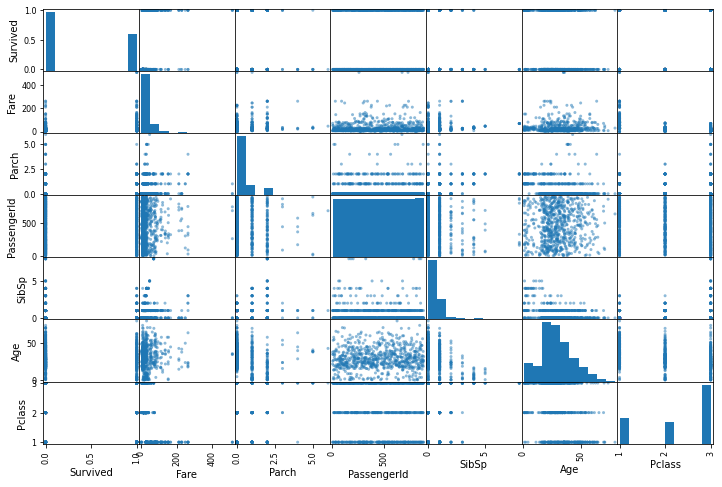

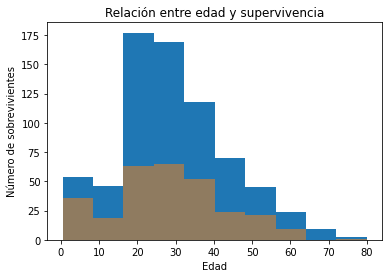

In [45]:
from pandas.plotting import scatter_matrix


attributes = ['Survived', 'Fare', 'Parch', 'PassengerId', 'SibSp', 'Age', 'Pclass']

#Todos
scatter_matrix(data_train[attributes], figsize=(12, 8))
plt.show()

y_target_age = data_train['Age']
plt.hist(y_target_age, density = False)

testing = data_train.loc[(data_train['Survived'] == 1)]['Age']
plt.xlabel('Edad')
plt.ylabel('Número de sobrevivientes')
plt.title('Relación entre edad y supervivencia')
plt.xticks(rotation=0)
plt.hist(testing, density = False, alpha = 0.5)
plt.show()

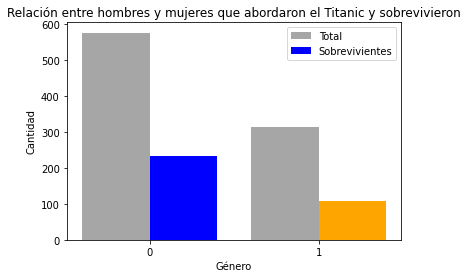

In [46]:
import numpy as np

survived_passengers = titanic_train[titanic_train['Survived'] == 1]

# Contar la cantidad de hombres y mujeres que sobrevivieron
survived_gender_counts = survived_passengers['Sex'].value_counts()

# Contar la cantidad total de hombres y mujeres que abordaron el barco
total_gender_counts = titanic_train['Sex'].value_counts()

# Crear la gráfica de barras
fig, ax = plt.subplots()
x = np.arange(len(total_gender_counts.index))
width = 0.4

# Barras para el total de hombres y mujeres que abordaron el barco
ax.bar(x - width/2, total_gender_counts, width, label='Total', color='gray', alpha=0.7)

# Barras para la cantidad de hombres y mujeres que sobrevivieron
ax.bar(x + width/2, survived_gender_counts, width, label='Sobrevivientes', color=['blue', 'orange'])

ax.set_xlabel('Género')
ax.set_ylabel('Cantidad')
ax.set_title('Relación entre hombres y mujeres que abordaron el Titanic y sobrevivieron')
ax.set_xticks(x)
ax.set_xticklabels(total_gender_counts.index)
ax.legend()

# Mostrar la gráfica
plt.show()

## Parte 4 - Un Primer Pipeline 

#### Objetivos:

- Construir un **pipeline** que realice el preprocesamiento de los datos necesario para que éstos puedan ser utilizados por un clasificador de *sklearn*. Dicho preprocesamiento deberá en primera instancia realizar las siguientes tareas:

    1. Descartar los atributos *Cabin*, *Name* y *Ticket*.
    2. Rellenar datos faltantes con algún criterio elegido

In [ ]:
# Pasamos los valores categoricos de "Sex", a binario (bool), 0 hombre y 1 mujer.

titanic_train['Sex'] = titanic_train['Sex'].apply(lambda x: 0 if x == 'male' else 1)

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Haremos el primer pipeline siguiendo el criterio de Edad = mediana del resto de las edades y Embarked = mas frecuente

titanic_firstpipe = titanic_train.copy()  # Create a copy of the DataFrame

X_firstpipe = titanic_firstpipe.drop("Survived", axis=1)  # Features
y_firstpipe = titanic_firstpipe["Survived"]  # Target variable

preprocessing_transformer_FP = ColumnTransformer(transformers=[
    ("age", SimpleImputer(strategy="median"), ["Age"]),
    ("embarked", Pipeline([
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("encode", OneHotEncoder(handle_unknown="ignore"))
    ]), ["Embarked"]),
    ("drop_columns", "drop", ["Cabin", "Name", "Ticket"])
], remainder="passthrough")

preprocessing_pipeline_FP = Pipeline(steps=[
    ("preprocessing", preprocessing_transformer_FP)
])

X_firstpipe_T = preprocessing_pipeline_FP.fit_transform(X_firstpipe)

print(pd.DataFrame(X_firstpipe_T))

        0    1    2    3      4    5    6    7    8        9
0    22.0  0.0  0.0  1.0    1.0  3.0  0.0  1.0  0.0   7.2500
1    38.0  1.0  0.0  0.0    2.0  1.0  1.0  1.0  0.0  71.2833
2    26.0  0.0  0.0  1.0    3.0  3.0  1.0  0.0  0.0   7.9250
3    35.0  0.0  0.0  1.0    4.0  1.0  1.0  1.0  0.0  53.1000
4    35.0  0.0  0.0  1.0    5.0  3.0  0.0  0.0  0.0   8.0500
..    ...  ...  ...  ...    ...  ...  ...  ...  ...      ...
886  27.0  0.0  0.0  1.0  887.0  2.0  0.0  0.0  0.0  13.0000
887  19.0  0.0  0.0  1.0  888.0  1.0  1.0  0.0  0.0  30.0000
888  28.0  0.0  0.0  1.0  889.0  3.0  1.0  1.0  2.0  23.4500
889  26.0  1.0  0.0  0.0  890.0  1.0  0.0  0.0  0.0  30.0000
890  32.0  0.0  1.0  0.0  891.0  3.0  0.0  0.0  0.0   7.7500

[891 rows x 10 columns]


In [49]:
import numpy as np

X_transformed_df = pd.DataFrame(X_firstpipe_T)

# Check for any missing/NaN values
missing_values = X_transformed_df.isna().any()

# Print the results
print("Hay valores faltantes o NaN en la X transformada?")
print(np.any(missing_values))

Hay valores faltantes o NaN en la X transformada?
False


## Parte 5 - Un Segundo Pipeline

#### Objetivos:

 - Realizar un **pipeline** que se quede como único atributo el género del pasajero. 

In [50]:
titanic_secondpipe = titanic_train.copy()  # Create a copy of the DataFrame

X_secondpipe = titanic_secondpipe.drop("Survived", axis=1)  # Features
y_secondpipe = titanic_secondpipe["Survived"]  # Target variable

# ColumnTransformer to keep only the "Sex" column
preprocessing_transformer = ColumnTransformer(transformers=[
    ("keep_sex", "passthrough", ["Sex"])
], remainder="drop")

# Create the final pipeline
preprocessing_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing_transformer)
])

# Fit and transform the data
X_secondpipe_T = preprocessing_pipeline.fit_transform(X_secondpipe)

# Check the transformed data
print(pd.DataFrame(X_secondpipe_T))

     0
0    0
1    1
2    1
3    1
4    0
..  ..
886  0
887  1
888  1
889  0
890  0

[891 rows x 1 columns]


## Parte 6 - Clasificación con Regresión Logística

#### Objetivos:
 - Con los datos procesados por los pipelines de la Parte 4 y Parte 5 entrenar un modelo de *Regresión Logística* con parámetros por defecto y estimar el desempeño mediante validación cruzada 5-folds.
 - Observe los desempeños obtenidos. ¿Qué puede decir sobre los datos? ¿Y sobre el modelo?

In [51]:
from sklearn.linear_model import LogisticRegression

logistic_regression_FP = LogisticRegression()

logistic_regression_FP.fit(X_firstpipe_T, y_firstpipe)

c:\Users\Javo\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
!pip install seaborn

Accuracy: 0.8024691358024691
Precision: 0.7694805194805194
Recall: 0.6929824561403509


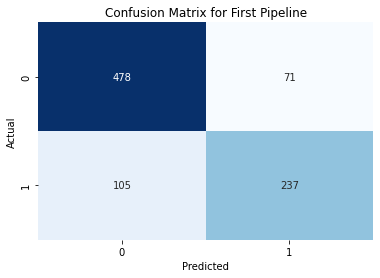

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns

y_pred_FP = logistic_regression_FP.predict(X_firstpipe_T)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_firstpipe, y_pred_FP)

# Calculate accuracy, precision, and recall scores
accuracy = accuracy_score(y_firstpipe, y_pred_FP)
precision = precision_score(y_firstpipe, y_pred_FP)
recall = recall_score(y_firstpipe, y_pred_FP)

# Print the scores
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Visualize the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for First Pipeline")
plt.show()

In [53]:
logistic_regression_SP = LogisticRegression()

logistic_regression_SP.fit(X_secondpipe_T, y_secondpipe)

LogisticRegression()

Accuracy: 0.7867564534231201
Precision: 0.7420382165605095
Recall: 0.6812865497076024


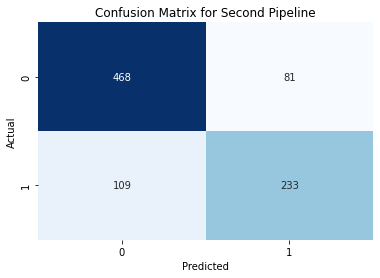

In [54]:
y_pred_SP = logistic_regression_SP.predict(X_secondpipe_T)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_secondpipe, y_pred_SP)

# Calculate accuracy, precision, and recall scores
accuracy = accuracy_score(y_firstpipe, y_pred_SP)
precision = precision_score(y_firstpipe, y_pred_SP)
recall = recall_score(y_firstpipe, y_pred_SP)

# Print the scores
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Visualize the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Second Pipeline")
plt.show()

## Parte 7 - Busqueda de Hiperparámetros

#### Objetivos:
 - Utilizar *Grid Search* para encontrar el valor óptimo del parámetro *C* del mejor clasificador de *Regresión Logística* obtenido de la parte anterior. 

In [ ]:
from sklearn.model_selection import GridSearchCV

logistic_regression_GC = LogisticRegression()

param_grid = {'C': [1, 5, 10, 15, 20, 25, 30]}

grid_search = GridSearchCV(estimator=logistic_regression_GC, param_grid=param_grid, cv=10, scoring='accuracy')

grid_search.fit(X_firstpipe_T, y_firstpipe)

best_C = grid_search.best_params_['C']

best_logistic_regression = grid_search.best_estimator_

print(f"Best C value: {best_C}")

Accuracy: 0.7991021324354658
Precision: 0.7637540453074434
Recall: 0.6900584795321637


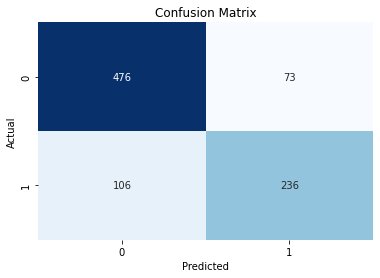

In [56]:
y_pred = best_logistic_regression.predict(X_firstpipe_T)

confusion_mat = confusion_matrix(y_firstpipe, y_pred)

accuracy = accuracy_score(y_firstpipe, y_pred)
precision = precision_score(y_firstpipe, y_pred)
recall = recall_score(y_firstpipe, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Parte 10 - Generar una Kaggle Submission

#### Objetivos:

 - Generar una Kaggle Submission utilizando las prediciones obtenidas en el conjunto de Test. Puede ver un ejemplo de como hacerlo [aquí](https://www.kaggle.com/jlawman/complete-beginner-your-first-titanic-submission?scriptVersionId=1700267&cellId=17). 

In [ ]:
predictions = best_logistic_regression.predict(X_test_FP)

predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
submission = pd.DataFrame({'PassengerId':titanic_test_FP['PassengerId'],'Survived':predictions})

#Visualize the first 5 rows
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
filename = 'Titanic_Predictions_1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic_Predictions_1.csv


Una vez generado el archivo *.csv*, la submission se puede realizar subiendo directamente el archivo a la página de Kaggle o desde la línea de comandos como:

`!kaggle competitions submit -c [COMPETITION] -f [FILE] -m [MESSAGE]`  

In [ ]:
!kaggle competitions submit -c titanic -f Titanic_Predictions_1.csv -m primer_submission

100% 2.77k/2.77k [00:00<00:00, 3.10kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

## Parte 11 - En busca de un mejor modelo

#### Objetivos:

 - Generar un nuevo **pipeline** y evaluar si éste genera un mejor clasificador. Algunas de las opciones que se pueden explorar son las siguientes:
    * Evaluar la característica Pclass como dato numérico, ordinal o categórico.    
    * Estudiar qué escalado sirve en los atributos numéricos   
    * Agregar nuevas características y/o sustituir las existentes. Por ejemplo:   
        - Reemplazar *SibSp* y *Parch* por la suma     
        - Discretizar algún atributo numérico, por ejemplo la edad.
    * Estudiar algún modelo alternativo (*Se sugiere experimentar con SVM o RandomForestClassifier*) 
    * Construir un **pipeline** que permita determinar automáticamente qué grupo de características utilizar y qué estrategia seguir para lidiar con datos faltantes.

#### Una vez hecho esos primeros pipelines, tambien es de interes ver la diferencia cuando se estudia con un pre-procesamiento de datos mas profundo, y utilizando el dato de Cabin.


In [59]:
with zipfile.ZipFile('titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('')
titanic_test = pd.read_csv('test.csv')

In [60]:
titanic_train = pd.read_csv('train.csv')

# Quitamos la columna "Survived" de titanic_train
titanic_train = titanic_train.drop("Survived", axis=1)

data_train = titanic_train.copy()


In [61]:
titanic_test_SP = titanic_test.copy()

# Pasamos los valores categoricos de "Sex", a binario (bool), 0 hombre y 1 mujer.
titanic_test_SP['Sex'] = titanic_test_SP['Sex'].apply(lambda x: 0 if x == 'male' else 1)
data_train['Sex'] = data_train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
titanic_train['Sex'] = titanic_train['Sex'].apply(lambda x: 0 if x == 'male' else 1)

# Rellenamos el valor faltante en Fare
median_fare = titanic_test_SP["Fare"].median()

titanic_test_SP["Fare"].fillna(median_fare, inplace=True)

data_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [62]:
# Revisamos cuantos valores faltan en cada columna

missing_values = titanic_train.isna().sum()

print(missing_values)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [63]:
# Vemos que faltan datos, especificamente en Edad. Queremos rellenar esos valores de edad y para eso usaremos la media del valor de las edades.

median_age = data_train['Age'].median()
data_train['Age'].fillna(median_age, inplace=True)

median_age_2 = titanic_test_SP['Age'].median()
titanic_test_SP['Age'].fillna(median_age_2, inplace=True)


Para rellenar los valores faltantes de Cabin, debemos entender que el valor de "Cabin" en el dataset representa la cabina que se le asigno a cada pasajero en el barco. 
La letra representa la parte del barco, y el numero el cuarto espeficico. 
Ya que son 700 datos faltantes, no tiene sentido ir uno a uno para remplazar los valores con las habitaciones especificas faltantes, pero lo que podemos hacer es hacer un estudio general de, en base al Pclass, saber en que parte del barco probablemente puedan estar.

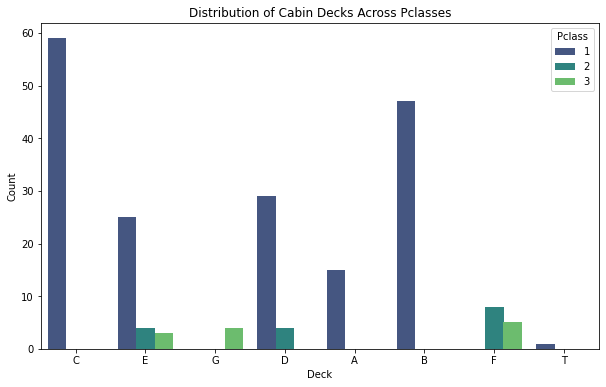

In [64]:
import seaborn as sns

titanic_train_copy = titanic_train.copy()

# Extract the deck information from the "Cabin" column
titanic_train_copy['Deck'] = titanic_train_copy['Cabin'].str[0]

# Drop rows with missing values in the "Deck" column
titanic_train_copy.dropna(subset=['Deck'], inplace=True)

# Create a bar chart to visualize the relationship between "Pclass" and cabin decks
plt.figure(figsize=(10, 6))
sns.countplot(x='Deck', hue='Pclass', data=titanic_train_copy, palette='viridis')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.title('Distribution of Cabin Decks Across Pclasses')
plt.legend(title='Pclass')
plt.show()

En base a la grafica de barras, podemos asumir que las Cabinas que empiezan con C, E, D, A, B y T eran especificamente para aquellos de menor clase, mientras que las cabinas G y F eran reservadas para alta clase.
Haremos la decision de tomar la cabina G para aquellos de Pclass 3, F para quellos de Pclass 2, y el resto distribuido de una forma coherente para los de Pclass 1.

Para ello crearemos una funcion assign_cabin que tome como parametro la fila a rellenar, y devuelva la cabina a la que deba pertenecer:

In [65]:
def assign_cabin(row):
    if pd.isna(row['Cabin']):
        if row['Pclass'] == 1:
            return np.random.choice(['A', 'B', 'C', 'D', 'E', 'T'], p=[0.15, 0.22, 0.25, 0.18, 0.17, 0.03])
        elif row['Pclass'] == 2:
            return 'F'
        elif row['Pclass'] == 3:
            return 'G'
    else:
        return row['Cabin']

data_train['Cabin'] = data_train.apply(assign_cabin, axis=1)
titanic_test_SP['Cabin'] = titanic_test_SP.apply(assign_cabin, axis=1)

# Y ahora hacemos que todos los pasajeros de la dataframe solo tengan su letra en Cabin:

data_train['Cabin'] = data_train['Cabin'].apply(lambda x: x[0] if pd.notna(x) else x)
titanic_test_SP['Cabin'] = titanic_test_SP['Cabin'].apply(lambda x: x[0] if pd.notna(x) else x)


In [66]:
# Por ultimo tenemos que ver los dos valores faltantes de Embarked 

titanic_train[titanic_train['Embarked'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


Vemos que las dos son mujeres con el mismo numero de ticket. Ticket, dentro de este data set es: "Ticket" column represents the ticket number assigned to each passenger.
Es decir, como comparten ticket, podemos asumir que entraron juntas.
Tambien vemos que son de Pclass 1, clase alta.

In [67]:
# Veamos el resto de pasajeros de clase alta:

titanic_train.loc[(titanic_train['Pclass'] == 1) & (titanic_train['Sex'] == 1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
11,12,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",1,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",1,45.0,1,1,36928,164.8667,NaN,S
862,863,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",1,48.0,0,0,17466,25.9292,D17,S
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,11751,52.5542,D35,S
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,C


In [68]:
filtered_data = titanic_train[(titanic_train['Pclass'] == 1) & (titanic_train['Sex'] == 1)]

embarked_counts = filtered_data.groupby('Embarked')['PassengerId'].count()

print(embarked_counts)

Embarked
C    43
Q     1
S    48
Name: PassengerId, dtype: int64


Viendo los valores de embarked del resto de pasajeras de primera clase, la mayoria entraron por el puerto S (Southampton). Ese usaremos para rellenar los valores.

In [69]:
data_train['Embarked'] = data_train['Embarked'].fillna('S')

In [70]:
# Ahora vemos que todos los datos estan rellenados para train:

missing_values = data_train.isna().sum()

print(missing_values)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [71]:
# Ahora vemos que todos los datos estan rellenados para test:

missing_values = titanic_test_SP.isna().sum()

print(missing_values)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [72]:
# Por ultimo, eliminamos la columna Survived, Name y Ticket ya que no son de uso para nosotros ahora (y Survived sera nuestra columna Y de entrenamiento), y aplicamos OneHotENcoder para embarked

preprocessing_transformer = ColumnTransformer(transformers=[
    ("embarked", OneHotEncoder(handle_unknown="ignore"), ["Embarked"]),
    ("cabin", OneHotEncoder(handle_unknown="ignore"), ["Cabin"]),
    ("drop_columns", "drop", ["Name", "Ticket"])
], remainder="passthrough")

preprocessing_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing_transformer)
])

X_transformed_2 = preprocessing_pipeline.fit_transform(data_train)
X_test_2 = preprocessing_pipeline.transform(titanic_test_SP)

print(pd.DataFrame(X_transformed_2))

print(pd.DataFrame(X_test_2))

      0    1    2    3    4    5    6    7    8    9    10     11   12   13  \
0    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0    1.0  3.0  0.0   
1    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0    2.0  1.0  1.0   
2    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0    3.0  3.0  1.0   
3    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0    4.0  1.0  1.0   
4    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0    5.0  3.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...  ...  ...   
886  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  887.0  2.0  0.0   
887  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  888.0  1.0  1.0   
888  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  889.0  3.0  1.0   
889  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  890.0  1.0  0.0   
890  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  891.0  3.0  0.0   

       14   15   16       17  
0    22.0  1.0  0.0 

#### Veamos la matriz de confusion para los valores de train y subimos la submission:

In [73]:
logistic_regression_TP = LogisticRegression()

logistic_regression_TP.fit(X_transformed_2, y_secondpipe)

c:\Users\Javo\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.8125701459034792
Precision: 0.7795527156549521
Recall: 0.7134502923976608


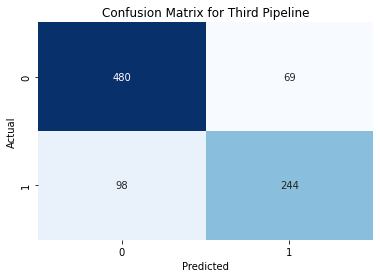

In [74]:
y_pred_TP = logistic_regression_TP.predict(X_transformed_2)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_secondpipe, y_pred_TP)

# Calculate accuracy, precision, and recall scores
accuracy = accuracy_score(y_firstpipe, y_pred_TP)
precision = precision_score(y_firstpipe, y_pred_TP)
recall = recall_score(y_firstpipe, y_pred_TP)

# Print the scores
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Visualize the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Third Pipeline")
plt.show()

In [76]:
titanic_test_FP = titanic_test.copy()  # Create a copy of the DataFrame

In [77]:
predictions_2 = logistic_regression_TP.predict(X_test_2)


submission_2 = pd.DataFrame({'PassengerId':titanic_test_FP['PassengerId'],'Survived':predictions_2})

#Visualize the first 5 rows
submission.head()

filename = 'Titanic_Predictions_2.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

!kaggle competitions submit -c titanic -f Titanic_Predictions_2.csv -m segunda_submission

NameError: name 'submission' is not defined

#### Ahora usaremos otro modelo (RandomForestClassifier)

In [78]:
from sklearn.ensemble import RandomForestClassifier

rfc_TP = RandomForestClassifier()

rfc_TP.fit(X_transformed_2, y_secondpipe)

RandomForestClassifier()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


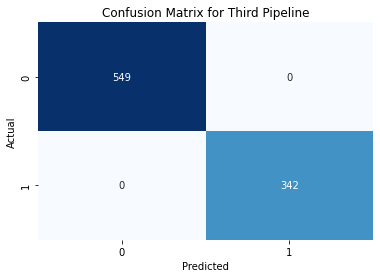

In [79]:
y_pred_TP = rfc_TP.predict(X_transformed_2)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_secondpipe, y_pred_TP)

# Calculate accuracy, precision, and recall scores
accuracy = accuracy_score(y_firstpipe, y_pred_TP)
precision = precision_score(y_firstpipe, y_pred_TP)
recall = recall_score(y_firstpipe, y_pred_TP)

# Print the scores
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Visualize the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Third Pipeline")
plt.show()

In [ ]:
predictions_3 = rfc_TP.predict(X_test_2)


submission_3 = pd.DataFrame({'PassengerId':titanic_test_FP['PassengerId'],'Survived':predictions_3})

#Visualize the first 5 rows
submission.head()

filename = 'Titanic_Predictions_3.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

!kaggle competitions submit -c titanic -f Titanic_Predictions_3.csv -m tercera_submission

## Parte 8 - Guardar Modelo (Movi al fondo para poder correr mi modelo y despues guardarlo)

#### Objetivos:
- Guarde el modelo obtenido de la parte anterior.
 
*Observación: Es usual que entrenar modelos tome un tiempo considerable por lo que el guardado del modelo resulta de vital importancia.*

In [80]:
import pickle

# Save the models to disk
with open('best_logistic_regression.pkl', 'wb') as f:
    pickle.dump(best_logistic_regression, f)

with open('logistic_regression_TP.pkl', 'wb') as f:
    pickle.dump(logistic_regression_TP, f)

with open('logistic_regression_SP.pkl', 'wb') as f:
    pickle.dump(logistic_regression_SP, f)

with open('logistic_regression_FP.pkl', 'wb') as f:
    pickle.dump(logistic_regression_FP, f)

## Parte 9 - Generar predicciones en conjunto de test

#### Objetivos:
 - Levante el modelo guardado en la parte anterior (Parte 7 - Busqueda de hyperparametros).
 - Genere las predicciones con el conjunto de test.

In [81]:
with open('best_logistic_regression.pkl', 'rb') as f:
    best_logistic_regression_loaded = pickle.load(f)

with open('logistic_regression_TP.pkl', 'rb') as f:
    logistic_regression_TP_loaded = pickle.load(f)

with open('logistic_regression_SP.pkl', 'rb') as f:
    logistic_regression_SP_loaded = pickle.load(f)

with open('logistic_regression_FP.pkl', 'rb') as f:
    logistic_regression_FP_loaded = pickle.load(f)

In [82]:
missing_values = titanic_test_FP.isna().sum()

print(missing_values)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Vemos que hay valores faltantes dentro de Test, asi que veremos donde ocurren y intentaremos llenar con un valor coherente.
Sabemos que nuestra pipeline puede lidiar con Cabin y con Age, pero no con Fare. Para lidiar con ese valor faltante haremos lo mismo que con Age y le damos un valor promedio.

In [83]:
# Pasamos los valores categoricos de "Sex", a binario (bool), 0 hombre y 1 mujer.
titanic_test_FP['Sex'] = titanic_test_FP['Sex'].apply(lambda x: 0 if x == 'male' else 1)

# Rellenamos el valor faltante en Fare

median_fare = titanic_test_FP["Fare"].median()

titanic_test_FP["Fare"].fillna(median_fare, inplace=True)

In [84]:
X_test_FP = preprocessing_pipeline_FP.fit_transform(titanic_test_FP)

print(pd.DataFrame(X_test_FP))

        0    1    2    3       4    5    6    7    8         9
0    34.5  0.0  1.0  0.0   892.0  3.0  0.0  0.0  0.0    7.8292
1    47.0  0.0  0.0  1.0   893.0  3.0  1.0  1.0  0.0    7.0000
2    62.0  0.0  1.0  0.0   894.0  2.0  0.0  0.0  0.0    9.6875
3    27.0  0.0  0.0  1.0   895.0  3.0  0.0  0.0  0.0    8.6625
4    22.0  0.0  0.0  1.0   896.0  3.0  1.0  1.0  1.0   12.2875
..    ...  ...  ...  ...     ...  ...  ...  ...  ...       ...
413  27.0  0.0  0.0  1.0  1305.0  3.0  0.0  0.0  0.0    8.0500
414  39.0  1.0  0.0  0.0  1306.0  1.0  1.0  0.0  0.0  108.9000
415  38.5  0.0  0.0  1.0  1307.0  3.0  0.0  0.0  0.0    7.2500
416  27.0  0.0  0.0  1.0  1308.0  3.0  0.0  0.0  0.0    8.0500
417  27.0  1.0  0.0  0.0  1309.0  3.0  0.0  1.0  1.0   22.3583

[418 rows x 10 columns]


In [85]:
X_test_FP = pd.DataFrame(X_test_FP)

# Check for any missing/NaN values
missing_values = X_test_FP.isna().any()

# Print the results
print("Hay valores faltantes o NaN en la X transformada?")
print(np.any(missing_values))

Hay valores faltantes o NaN en la X transformada?
False


In [86]:
predictions = best_logistic_regression.predict(X_test_FP)

predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,